<span style="color:red; font-size:30px;">Valuation Analysis of Underlying Companies across 5 Funds

#### This project analyzes the valuation of underlying companies within five investment funds by computing and comparing EV/EBITDA multiples at fund entry and subsequent record dates. The analysis is aggregated by sector (Level 1) and continent, with visualizations and insights derived from financial trends over the given period.


#### ...............................

### Contents

 1. Assumptions
 2. Dependencies
 3. Import Data
 4. Data Preparation and Cleaning
 5. Analysis & Insights
 6. Conclusion
 

### 1. Assumptions

 
 - Ebitda has been annualised - The value of a company cannot be based on just a quarter's performance.
 - Enterprise value cannot be zero after investment. Cells with '0' were replaced with values of the cell preceeding them.

### 2. Methodology


 - Multiples were calculated using the EV divided by EBITDA formula.  
 - EV/EBITDA multiples were rounded off to 2 demial place.
 - Forward filling technique was employed in dealing with cell values of '0'.

### 3. Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
from pivottablejs import pivot_ui

### 4. Import Data

In [2]:
# Import Comapny Level Metrics (clm) dataset and show top 3 rows

clm= pd.read_csv("C:/Users/Acer/Desktop/Ardian Secondaries & Primaries - Data Test/company_level_metrics.csv")
clm.head(3)

,fund_name,Company,company_geography,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta
0,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/09/2023,425.297600,01/06/2021,560.45,84.48,1042.80,139.44
1,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/06/2023,313.654377,01/06/2021,560.45,84.48,855.84,117.96
2,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",31/03/2023,274.930495,01/06/2021,560.45,84.48,775.80,112.80


In [3]:
#Import geographies dataset and show the top 3 rows

geographies= pd.read_csv("C:/Users/Acer/Desktop/Ardian Secondaries & Primaries - Data Test/geographies.csv")
geographies.head(3)

,country,region,continent
0,Scotland,Northern Europe,Europe
1,Aland Islands,Northern Europe,Europe
2,Denmark,Northern Europe,Europe


In [4]:
#Import sectors dataset and show the last 3 rows

sectors= pd.read_csv("C:/Users/Acer/Desktop/Ardian Secondaries & Primaries - Data Test/sectors.csv")

sectors.tail(3)

,sector_level_1,sector_level_2,sector_level_3,sector_level_4
158,Utilities,Utilities,Water Utilities,Water Utilities
159,Utilities,Utilities,Independent Power and Renewable Electricity Pr...,Independent Power Producers & Energy Traders
160,Utilities,Utilities,Independent Power and Renewable Electricity Pr...,Renewable Electricity


### 5. Data Preparation and Cleaning

Check data for null values, empty cells, dash and zero

In [5]:
# Check for null values
null_values = clm.isnull()

# Check for empty strings
empty_values = clm.applymap(lambda x: x == '')

# Check for dashes
dash_values = clm.applymap(lambda x: x == '-')

# Combine all checks
all_checks = null_values | empty_values | dash_values

# Sum the total count of undesirable values for each column
undesirable_count_per_column = all_checks.sum()

# Check if any undesirable values exist in the entire DataFrame
any_undesirable_values = all_checks.any().any()

print("Are there any null values, empty cells, or dashes in our dataset?")
any_undesirable_values

Are there any null values, empty cells, or dashes in our dataset?


False

In [6]:
# Whle inspecting the data in Excel, some cells in at_entry_ev and at_entry_ebidta were found to contain '0'.

# Filter rows where either 'at_entry_multiple' or 'at_rd_multiple' is zero
zero_rows = clm[(clm['at_entry_ev'] == 0) | (clm['at_entry_ebidta'] == 0)]

print("Rows with values as '0':")
zero_rows

Rows with values as '0':


,fund_name,Company,company_geography,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta
33,Fund III,Company 6,Germany,Chemicals,31/12/2022,180.789782,01/07/2022,0.0,51.81,451.560,56.88
34,Fund III,Company 6,Germany,Chemicals,30/09/2022,167.646171,01/07/2022,0.0,51.81,456.936,57.84
88,Fund IV,Company 15,United States of America,Software,31/03/2022,799.900000,01/03/2021,0.0,0.00,5198.800,272.40


In [7]:
# To decide how to deal with the zeros, a decision was made to further inspect company 6 and 15 further.

# Filter rows for 'Company 6' and 'Company 15'
filtered_rows = clm[clm['Company'].isin(['Company 6', 'Company 15'])]

print("Company 6 and Company 15 rows:")
filtered_rows

Company 6 and Company 15 rows:


,fund_name,Company,company_geography,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta
30,Fund III,Company 6,Germany,Chemicals,30/09/2023,177.060651,01/07/2022,399.85,51.81,420.600,52.80
31,Fund III,Company 6,Germany,Chemicals,30/06/2023,172.376471,01/07/2022,399.85,51.81,414.840,52.08
32,Fund III,Company 6,Germany,Chemicals,31/03/2023,172.639041,01/07/2022,399.85,51.81,431.400,52.80
33,Fund III,Company 6,Germany,Chemicals,31/12/2022,180.789782,01/07/2022,0.00,51.81,451.560,56.88
34,Fund III,Company 6,Germany,Chemicals,30/09/2022,167.646171,01/07/2022,0.00,51.81,456.936,57.84
82,Fund IV,Company 15,United States of America,Software,30/09/2023,874.950000,01/03/2021,3905.00,176.00,5589.000,273.60
83,Fund IV,Company 15,United States of America,Software,30/06/2023,865.450000,01/03/2021,3905.00,176.00,5692.600,273.60
84,Fund IV,Company 15,United States of America,Software,31/03/2023,860.700000,01/03/2021,3905.00,176.00,5566.800,283.20
85,Fund IV,Company 15,United States of America,Software,31/12/2022,828.400000,01/03/2021,3905.00,176.00,5243.200,301.20
86,Fund IV,Company 15,United States of America,Software,30/09/2022,821.750000,01/03/2021,3905.00,176.00,5261.000,304.80


Looking at the above, for company 15, we can see that the first 4 quarters prior to the cell with '0' and the next 4 quarters after that all have the same value - 3905.00, it is therefore safe to assume that '0' could also be 3905.00. 

For company 6, the same theory applies. Further evidence shows that at_entry_ebitda remained static, all through the investment timeline.

Therefore, the cells containing '0' will be filled with the value of the preceding cell on top. This method is called forward filling. 

##### Please note that the first course of action in high-stake environment is to check with the data source and confirm if it was an error or not before augumentation is done as in this case.

In [8]:
# Fill cells containing zero with the value of the preceding cell on top
clm['at_entry_ev'] = clm['at_entry_ev'].replace(0, pd.NA).fillna(method='ffill')
clm['at_entry_ebidta'] = clm['at_entry_ebidta'].replace(0, pd.NA).fillna(method='ffill')

print("DataFrame after filling zeros:")
clm

DataFrame after filling zeros:


,fund_name,Company,company_geography,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta
0,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/09/2023,425.297600,01/06/2021,560.45,84.48,1042.80,139.44
1,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/06/2023,313.654377,01/06/2021,560.45,84.48,855.84,117.96
2,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",31/03/2023,274.930495,01/06/2021,560.45,84.48,775.80,112.80
3,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",31/12/2022,240.902364,01/06/2021,560.45,84.48,740.88,105.60
4,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/09/2022,216.573273,01/06/2021,560.45,84.48,711.12,97.08
...,...,...,...,...,...,...,...,...,...,...,...
388,Fund I,Company 50,United States of America,Software,31/12/2022,1363.345514,29/07/2021,2851.42,35.64,2709.84,60.72
389,Fund I,Company 50,United States of America,Software,30/09/2022,967.480366,29/07/2021,2851.42,35.64,2216.04,50.16
390,Fund I,Company 50,United States of America,Software,30/06/2022,1295.040488,29/07/2021,2851.42,35.64,2605.20,38.40
391,Fund I,Company 50,United States of America,Software,31/03/2022,1733.751893,29/07/2021,2851.42,35.64,3096.84,35.16


In [9]:
# Check if the filling has been done correctly
# Filter rows for 'Company 6' and 'Company 15'
filtered_rows = clm[clm['Company'].isin(['Company 6', 'Company 15'])]

print("Cells containing '0' in Company 6 and Company 15 have now been populated:")
filtered_rows

Cells containing '0' in Company 6 and Company 15 have now been populated:


,fund_name,Company,company_geography,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta
30,Fund III,Company 6,Germany,Chemicals,30/09/2023,177.060651,01/07/2022,399.85,51.81,420.600,52.80
31,Fund III,Company 6,Germany,Chemicals,30/06/2023,172.376471,01/07/2022,399.85,51.81,414.840,52.08
32,Fund III,Company 6,Germany,Chemicals,31/03/2023,172.639041,01/07/2022,399.85,51.81,431.400,52.80
33,Fund III,Company 6,Germany,Chemicals,31/12/2022,180.789782,01/07/2022,399.85,51.81,451.560,56.88
34,Fund III,Company 6,Germany,Chemicals,30/09/2022,167.646171,01/07/2022,399.85,51.81,456.936,57.84
82,Fund IV,Company 15,United States of America,Software,30/09/2023,874.950000,01/03/2021,3905.00,176.00,5589.000,273.60
83,Fund IV,Company 15,United States of America,Software,30/06/2023,865.450000,01/03/2021,3905.00,176.00,5692.600,273.60
84,Fund IV,Company 15,United States of America,Software,31/03/2023,860.700000,01/03/2021,3905.00,176.00,5566.800,283.20
85,Fund IV,Company 15,United States of America,Software,31/12/2022,828.400000,01/03/2021,3905.00,176.00,5243.200,301.20
86,Fund IV,Company 15,United States of America,Software,30/09/2022,821.750000,01/03/2021,3905.00,176.00,5261.000,304.80


Next, columns are renamed to match with corresponding dataset. This is important especially for the primary key which datasets will be joined on. 

In [10]:
# Rename column name in clm dataset and show top 3 rows

# the column 'company_geography' is renamed as 'country' to enable joining with corresponding column in geographies table
clm.rename(columns={'company_geography': 'country'}, inplace=True)
clm.head(3)

,fund_name,Company,country,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta
0,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/09/2023,425.297600,01/06/2021,560.45,84.48,1042.80,139.44
1,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/06/2023,313.654377,01/06/2021,560.45,84.48,855.84,117.96
2,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",31/03/2023,274.930495,01/06/2021,560.45,84.48,775.80,112.80


Next, the geography and sector dataset are joined to clm dataset such that each row shows corresponding region, continent and sectors.

In [11]:
# Join the geographies data to the CLM data and show the top 3 columns

# Performing a left join using 'country' as the primary key
df = pd.merge(clm,geographies,on='country')
print("Region and Continent are the last two columns below:")
df.head(3)

Region and Continent are the last two columns below:


,fund_name,Company,country,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta,region,continent
0,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/09/2023,425.297600,01/06/2021,560.45,84.48,1042.80,139.44,North America,America
1,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/06/2023,313.654377,01/06/2021,560.45,84.48,855.84,117.96,North America,America
2,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",31/03/2023,274.930495,01/06/2021,560.45,84.48,775.80,112.80,North America,America


In [12]:
# Join the sectors data to the df above and print the top 3 columns

merge_df = pd.merge(df,sectors,how='left', left_on='sector_level_3', right_on='sector_level_3')

#Extract desired columns and create a new column
df['sector_level_1'] = merge_df['sector_level_1']

print("sector_level_1 is the last column in the table below:")
df.head(3)

sector_level_1 is the last column in the table below:


,fund_name,Company,country,sector_level_3,record_date,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta,region,continent,sector_level_1
0,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/09/2023,425.297600,01/06/2021,560.45,84.48,1042.80,139.44,North America,America,Information Technology
1,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",30/06/2023,313.654377,01/06/2021,560.45,84.48,855.84,117.96,North America,America,Information Technology
2,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",31/03/2023,274.930495,01/06/2021,560.45,84.48,775.80,112.80,North America,America,Information Technology


### 6. Analysis and Insights

##### Here, the aim is to generate insights by asking and answering pertinent questions.

# .................

#### A. How many companies have each fund invested in?

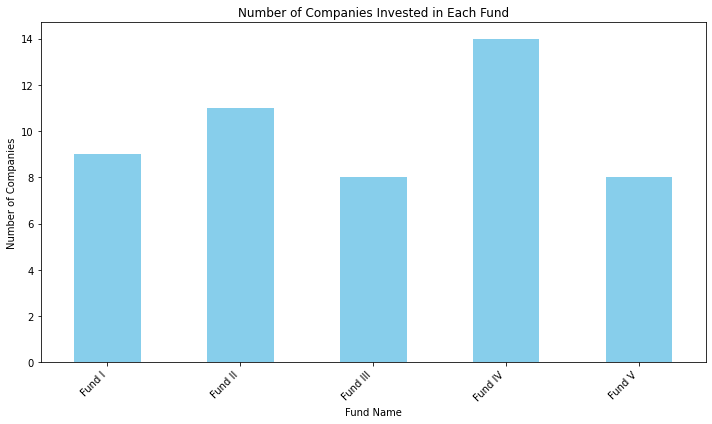

In [13]:
# Group by 'fund_name' and count unique companies
companies_per_fund = df.groupby('fund_name')['Company'].nunique()

# Visualize using a bar chart
plt.figure(figsize=(10, 6))
companies_per_fund.plot(kind='bar', color='skyblue')
plt.title('Number of Companies Invested in Each Fund')
plt.xlabel('Fund Name')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insight:
From the above chart, Fund IV has invested the most, with 14 companies in its portfolio.This accounts for 28% of all companies invested across all funds. Fund II and I follow closely at 11(22%) and 9(18%) companies, respectively. 

#### How many countries have been invested in and what is the count of  investment in each country?

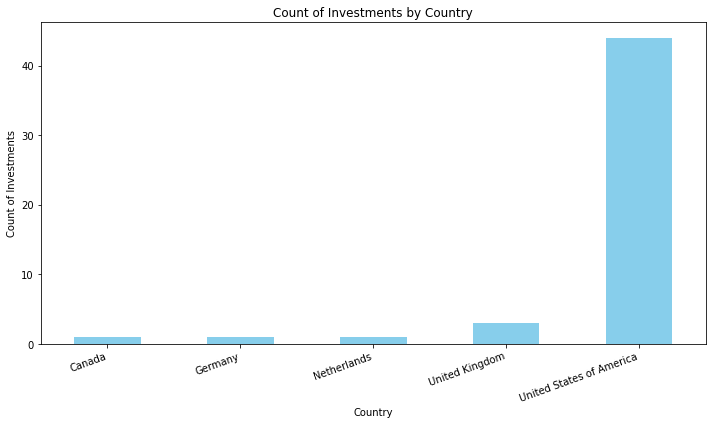

In [14]:
# Count investments by country
companies_per_country = df.groupby('country')['Company'].nunique()

# Plot the count of investments by country
plt.figure(figsize=(10, 6))
companies_per_country.plot(kind='bar', color='skyblue')
plt.title('Count of Investments by Country')
plt.xlabel('Country')
plt.ylabel('Count of Investments')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

#### Insight:
Across all funds, the United States of America is the most preferred country of choice with 44 companies and the closest country, the United Kingdom, having just 3 companies. 

#### At record and entry, how has the enterprise value of the companies in each fund grown across continents?

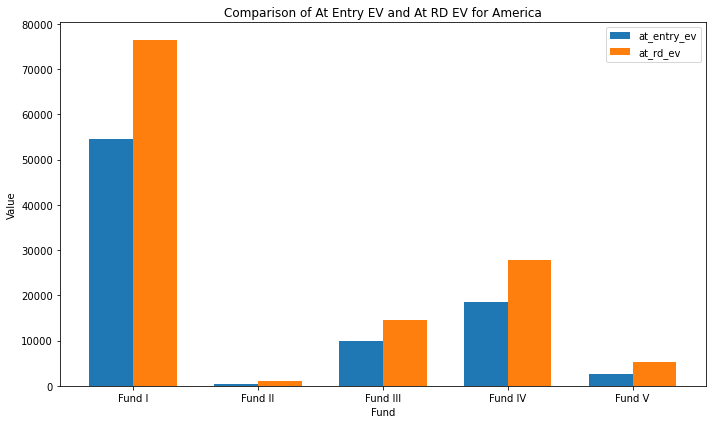

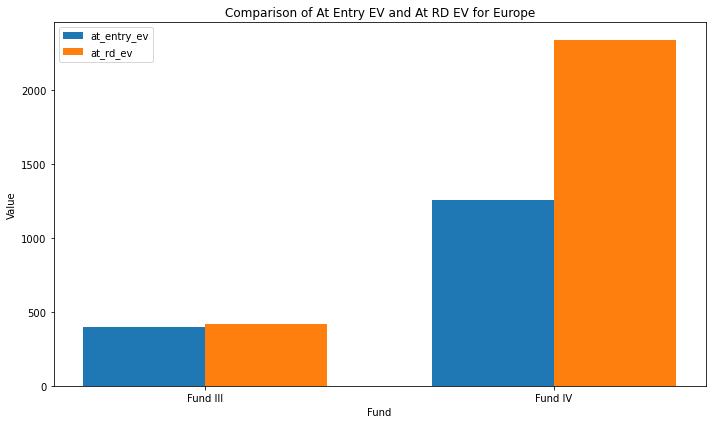

In [15]:
# Convert Record Date to datetime format
df['record_date'] = pd.to_datetime(df['record_date'], format='%d/%m/%Y')

# Filter data for the most recent record date for each company
most_recent = df[df['record_date'] == df['record_date'].max()]

# Aggregate data by fund_name
agg_data = most_recent.groupby(['continent', 'fund_name']).agg({
    'at_entry_ev': 'sum',
    'at_rd_ev': 'sum'
}).reset_index()

# Grouping by continent to plot separately
for continent, group in agg_data.groupby('continent'):
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(group))

    plt.bar(index, group['at_entry_ev'], bar_width, label='at_entry_ev')
    plt.bar([i + bar_width for i in index], group['at_rd_ev'], bar_width, label='at_rd_ev')

    plt.xlabel('Fund')
    plt.ylabel('Value')
    plt.title(f'Comparison of At Entry EV and At RD EV for {continent}')
    plt.xticks([i + bar_width / 2 for i in index], group['fund_name'])
    plt.legend()
    plt.tight_layout()
    plt.show()

##### Insight:
The comparison of enterprise value (EV) at record date and entry date across all funds shows a consistent trend with the EV at record date consistently surpassing that at entry. This suggests a general upward trajectory in the value of these funds over time, indicating potential growth and positive performance.

#### What is the sector exposure of all funds?

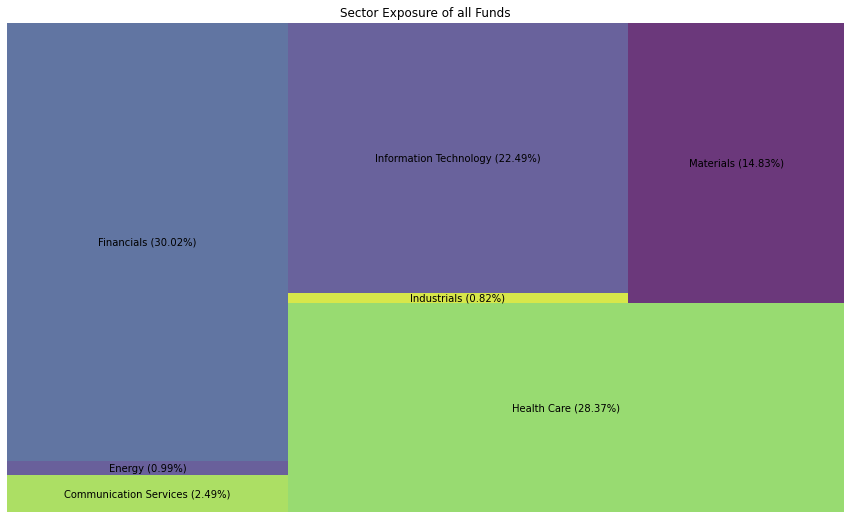

In [16]:
# Convert Record Date to datetime
df['record_date'] = pd.to_datetime(df['record_date'], format='%d/%m/%Y')

# Get the most recent record date for each sector
most_recent = df[df['record_date'] == df['record_date'].max()]

# Group by sector and sum the At RD EV values
sector_ev = most_recent.groupby('sector_level_1')['at_rd_ev'].sum().reset_index()

# Calculate percentage of each sector's EV contribution relative to the total EV
total_ev = sector_ev['at_rd_ev'].sum()
sector_ev['percentage'] = (sector_ev['at_rd_ev'] / total_ev) * 100

# Plotting the treemap
plt.figure(figsize=(15, 9))
squarify.plot(sizes=sector_ev['at_rd_ev'], label=[f'{s} ({p:.2f}%)' for s, p in zip(sector_ev['sector_level_1'], sector_ev['percentage'])], alpha=0.8)
plt.axis('off')
plt.title('Sector Exposure of all Funds')
plt.show()

#### Insight:
The portfolio of the funds under managemnt  has over 80% of its sector exposure in Financials, Health Care and Information Technology. This shows an optimistic portfolio structure as all three sectors are important drivers of the real economy. 

#### What is the trajectory of Net Asset Value at record date?

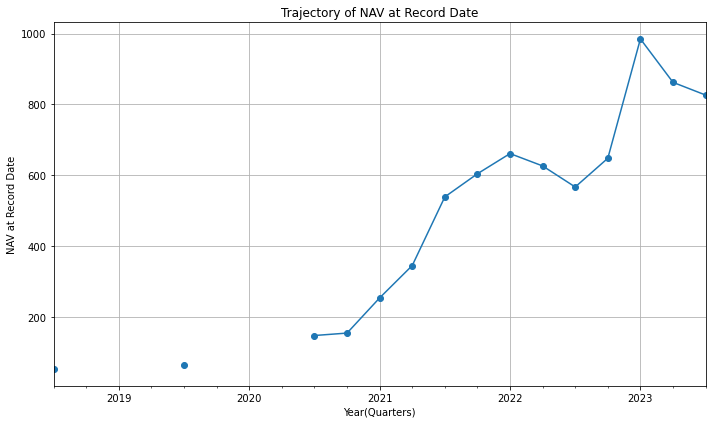

In [17]:
# Convert date columns to datetime objects
df['record_date'] = pd.to_datetime(df['record_date'], format='%d/%m/%Y')
df['investment_date'] = pd.to_datetime(df['investment_date'], format='%d/%m/%Y')

# Set record date as index
df.set_index('record_date', inplace=True)

# Resample data to quarterly frequency and take mean for nav_at_rd
quarterly_data = df['nav_at_rd'].resample('Q').mean()

# Plot the trajectory of nav_at_rd
plt.figure(figsize=(10, 6))
quarterly_data.plot(marker='o')
plt.title('Trajectory of NAV at Record Date')
plt.xlabel('Year(Quarters)')
plt.ylabel('NAV at Record Date')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insight:
Through the lifecyle of the funds, the NAV has largely been on the rise. Though it dipped in Q3 of 2022 to less than 600, it picked up again and hit almost 1000 by Q1 2023. There's been another slight dip in value Q2 and Q3 2023, with the net asset value at record date been just above 800.

The NAV represent the per share value of the funds. For this investment fund, the NAV has greatly apprecited over time and could probably appreciate more in value when the valuation of portfolio companies increase.

#### Compute valuation multiple

To compute the multiple, we'll use EV (enterprise value) as the value measured and EBITDA (earnings before interest, taxes, depreciation, and amortization) as the value driver. 

The EV/EBITDA multiple is mostly used in practice for comparable analysis where the valuation of companies in a peer group (usually sectors or geography) are compared to know what the current state of the market is. 

Formula:
EV/EBITDA multiple = EV/EBITDA

In [18]:
# Compute EV/EBITDA ratio
df['at_entry_multiple'] = df['at_entry_ev'] / df['at_entry_ebidta']
df['at_rd_multiple'] = df['at_rd_ev'] / df['at_rd_ebidta']

#Round off the EV/EBITDA ratio to 2 decimal place
df['at_entry_multiple'] = df['at_entry_multiple'].round(decimals=2)
df['at_rd_multiple'] = df['at_rd_multiple'].round(decimals=2)

print("The multiples have been computed and are shown in the last two columns below:")
df.head(5)

The multiples have been computed and are shown in the last two columns below:


,fund_name,Company,country,sector_level_3,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta,region,continent,sector_level_1,at_entry_multiple,at_rd_multiple
record_date,,,,,,,,,,,,,,,
2023-09-30,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",425.297600,2021-06-01,560.45,84.48,1042.80,139.44,North America,America,Information Technology,6.63,7.48
2023-06-30,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",313.654377,2021-06-01,560.45,84.48,855.84,117.96,North America,America,Information Technology,6.63,7.26
2023-03-31,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",274.930495,2021-06-01,560.45,84.48,775.80,112.80,North America,America,Information Technology,6.63,6.88
2022-12-31,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",240.902364,2021-06-01,560.45,84.48,740.88,105.60,North America,America,Information Technology,6.63,7.02
2022-09-30,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",216.573273,2021-06-01,560.45,84.48,711.12,97.08,North America,America,Information Technology,6.63,7.33


#### Comparing multiple by continent

Compare the mean entry and record date multiple across continents?

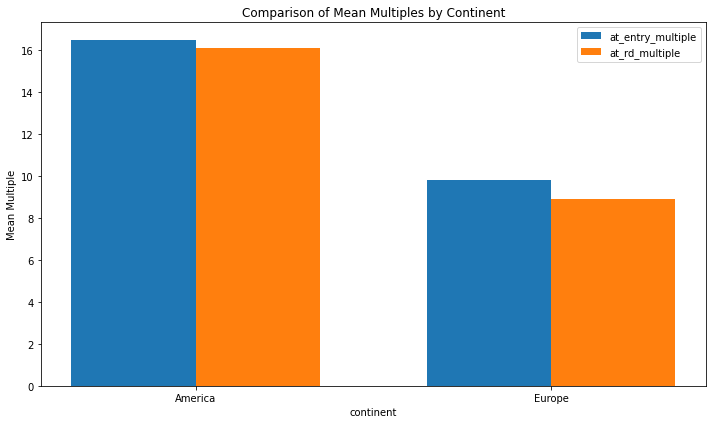

In [19]:
# Group by continent and calculate the mean multiples
continent_mean = df.groupby('continent').mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(continent_mean))

plt.bar(index, continent_mean['at_entry_multiple'], bar_width, label='at_entry_multiple')
plt.bar([i + bar_width for i in index], continent_mean['at_rd_multiple'], bar_width, label='at_rd_multiple')

plt.xlabel('continent')
plt.ylabel('Mean Multiple')
plt.title('Comparison of Mean Multiples by Continent')
plt.xticks([i + bar_width / 2 for i in index], continent_mean.index)
plt.legend()
plt.tight_layout()
plt.show()

#### Insight:
While some companies are doing really well, overall the multiple at entry is still higher than at record date across all funds. This shows that some companies are still cheaper to buy as they have not fully appreciated the investments made in them.

It is important to note that taking the mean might have skewed the data as there are companies that have done 20x at record date and there are those doing less than entry multiple. However, using mean multiple gives us an highlevel perspective of the managed funds performance across continents.

#### Comparing multiple by sector level 1

What are the top companies in the financials sector by entry and record multiple?

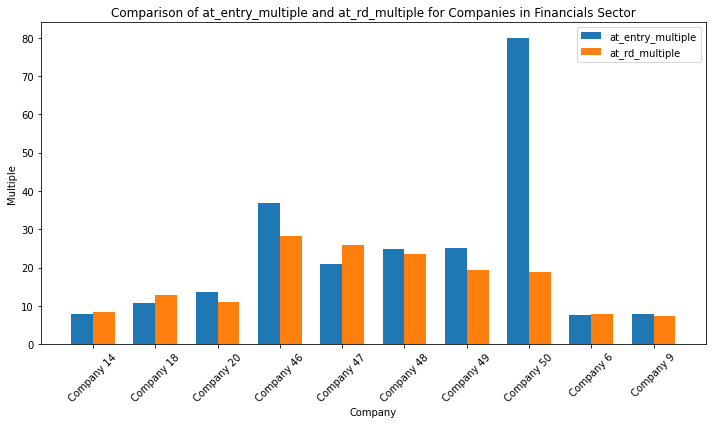

In [19]:
# Convert Record Date to datetime format
df['record_date'] = pd.to_datetime(df['record_date'])

# Filter companies in the Industrials sector
financials_df = df[df['sector_level_1'] == 'Financials']

# Filter for the most recent records for each company
most_recent = financials_df.loc[financials_df.groupby('Company')['record_date'].idxmax()]

# Plot a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(most_recent))

plt.bar(index, most_recent['at_entry_multiple'], bar_width, label='at_entry_multiple')
plt.bar([i + bar_width for i in index], most_recent['at_rd_multiple'], bar_width, label='at_rd_multiple')

plt.xlabel('Company')
plt.ylabel('Multiple')
plt.title('Comparison of at_entry_multiple and at_rd_multiple for Companies in Financials Sector')
plt.xticks([i + bar_width / 2 for i in index], most_recent['Company'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights:
For most companies in the management's Financial sector portfolio, the record multiple is less than the entry multiple. Only a few companies (14,18,47,and 6) have managed to increase in valuation over the course of the funds.

Depending on the lifespan of the funds, the companies might need a few more quarters to increase EBITDA and subsequently, assets.

Top companies in the industrials by entry and record multiple

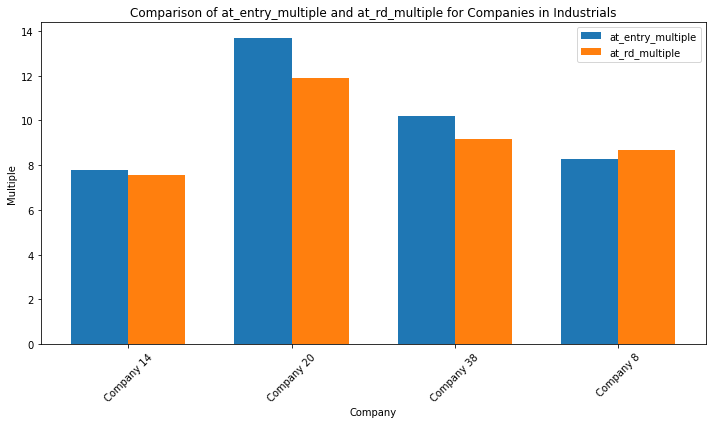

In [20]:
# Convert Record Date to datetime format
df['record_date'] = pd.to_datetime(df['record_date'])

# Filter companies in the Industrials sector
industrials_df = df[df['sector_level_1'] == 'Industrials']

# Filter for the most recent records for each company
most_recent = industrials_df.loc[industrials_df.groupby('Company')['record_date'].idxmax()]

# Plot a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(most_recent))

plt.bar(index, most_recent['at_entry_multiple'], bar_width, label='at_entry_multiple')
plt.bar([i + bar_width for i in index], most_recent['at_rd_multiple'], bar_width, label='at_rd_multiple')

plt.xlabel('Company')
plt.ylabel('Multiple')
plt.title('Comparison of at_entry_multiple and at_rd_multiple for Companies in Industrials')
plt.xticks([i + bar_width / 2 for i in index], most_recent['Company'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights:
As in the Financial sector, the Industrial sector shows a consistent trend where the multiple at entry tends to exceed that at record. This discrepancy suggests that companies typically have higher valuation expectations at the time of investment compared to their subsequent performance. There might be a need for periodic reassessment to ensure alignment with investment goals and market dynamics.

#### Comp Analysis using filters and buttons

A smarter way to run comparison analysis in python is to create a similtude of Excel's pivot chart. With that, we are able to compare as many companies as we want and derive insights across interested sectors or companies.

In [20]:
# Running the EV/EBITDA multiple compilation again but this time adding 'x' at the end of each multiple

# Compute EV/EBITDA ratio as new columns for both entry and record date 
df['at_entry_multiple'] = df['at_entry_ev'] / df['at_entry_ebidta']
df['at_rd_multiple'] = df['at_rd_ev'] / df['at_rd_ebidta']

# Round off the EV/EBITDA ratio to 2 decimal place and add 'x' at the end
df['at_entry_multiple'] = (df['at_entry_multiple'].round(decimals=2)).astype(str) + 'x'
df['at_rd_multiple'] = (df['at_rd_multiple'].round(decimals=2)).astype(str) + 'x'

# Display the DataFrame with rounded EV/EBITDA ratios
df.head(3)

,fund_name,Company,country,sector_level_3,nav_at_rd,investment_date,at_entry_ev,at_entry_ebidta,at_rd_ev,at_rd_ebidta,region,continent,sector_level_1,at_entry_multiple,at_rd_multiple
record_date,,,,,,,,,,,,,,,
2023-09-30,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",425.297600,2021-06-01,560.45,84.48,1042.80,139.44,North America,America,Information Technology,6.63x,7.48x
2023-06-30,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",313.654377,2021-06-01,560.45,84.48,855.84,117.96,North America,America,Information Technology,6.63x,7.26x
2023-03-31,Fund III,Company 1,United States of America,"Electronic Equipment, Instruments & Components",274.930495,2021-06-01,560.45,84.48,775.80,112.80,North America,America,Information Technology,6.63x,6.88x


In [21]:
# Here, the low-code solution for comp analysis is implemented.

print('Now you can now move columns around and generate table or visualisation on the go:')
pivot_ui(df)

Now you can now move columns around and generate table or visualisation on the go:
